  Unnamed: 0        PM1      PM2.5       PM10     PM1 a    PM2.5 a      PM10a  \
0 2022-08-04  19.378947  27.289474  32.094737  3.096522  10.666087  21.862174   
1 2022-08-04  27.289062  36.418750  42.357813  3.259833  10.597667  20.087333   
2 2022-08-04  20.450000  26.304688  29.070312  3.007000   9.395667  18.026833   
3 2022-08-04  16.787500  21.093750  23.289062  2.589833   9.663500  18.372167   
4 2022-08-04   6.325397   7.788889   9.293651  2.847833  13.124167  24.504500   

        Temp     RelHum  Temp satelite  humidity sate  Wind_Speed  \
0  29.582609  39.373913          26.66          87.25        1.43   
1  32.573333  51.065000          25.98          91.25        1.40   
2  33.730000  56.115000          25.27          95.12        1.27   
3  33.441667  58.493333          24.57          97.62        1.08   
4  32.778333  59.880000          24.16          97.81        1.13   

   Wind_Direction  
0          280.08  
1          278.67  
2          281.38  
3          285.55 

<ipython-input-1-7065dc900ebd>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.1375022815297428


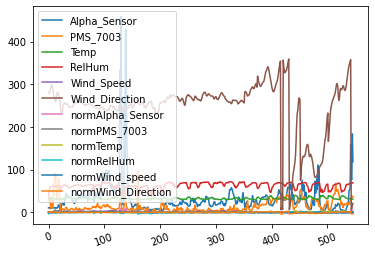

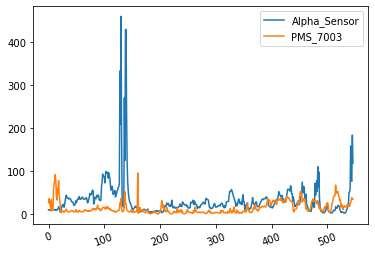

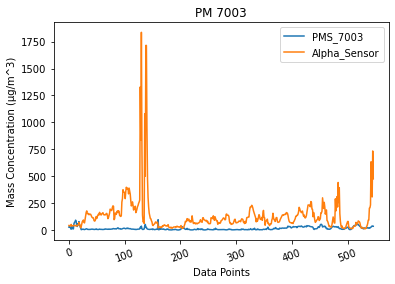

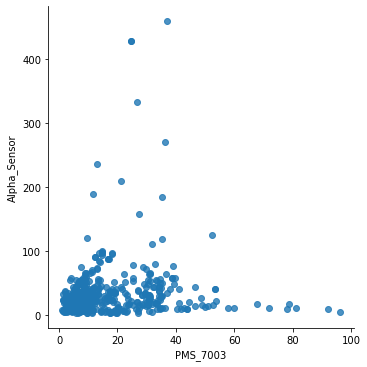

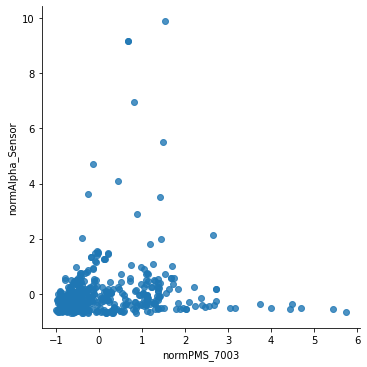

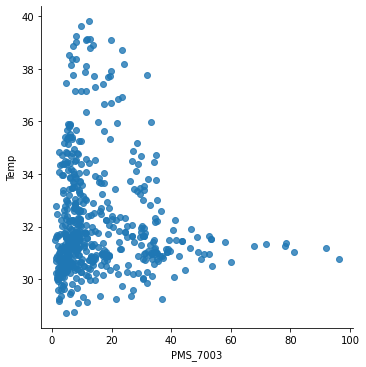

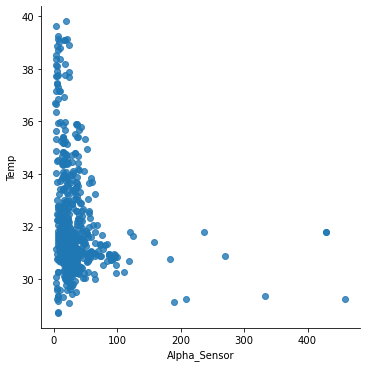

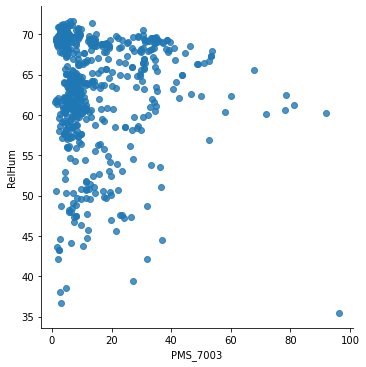

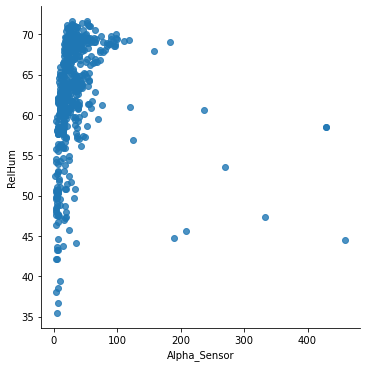

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_excel("PMS 7003.xlsx", sheet_name = "30.")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["PM2.5 a"], 'PMS_7003': sensor["PM2.5"], 'Temp': sensor["Temp"],
                'RelHum': sensor["RelHum"], 'Wind_Speed': sensor["Wind_Speed"], 'Wind_Direction': sensor["Wind_Direction"]})

# Split main dataset and build train and test datasets
X = df[['PMS_7003', 'Temp', 'RelHum', 'Wind_Direction', 'Wind_Speed']]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'PMS_7003': X_train["PMS_7003"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"],
                        'Wind_Direction': X_train["Wind_Direction"],'Wind_Speed': X_train["Wind_Speed"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'PMS_7003': X_test["PMS_7003"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"],
                       'Wind_Direction': X_test["Wind_Direction"],'Wind_Speed': X_test["Wind_Speed"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["PMS_7003"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normPMS_7003"] = normalize(df["PMS_7003"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])
df["normWind_speed"] = normalize(df["Wind_Speed"])
df["normWind_Direction"] = normalize(df["Wind_Direction"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
# Temp_PMS_7003 = sensor[["Temp", "PMS_7003"]]
# print(Temp_PMS_7003.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "PMS_7003"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
PMS_7003_Alpha_Sensor_factor = df[["PMS_7003", "Alpha_Sensor"]]
PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"]
PMS_7003_Alpha_Sensor_factor.plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'PMS_7003', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normPMS_7003', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to PMS_7003
sns.lmplot(x = 'PMS_7003', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to PMS_7003
sns.lmplot(x = 'PMS_7003', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["PMS_7003"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 331.6147966825352
Coefficients: 
 [ 0.76453342 -6.01412135  0.40329245 -0.6762178  18.12587312]
Loss functions:
* R-squared = -29.774155926586886
* RMSE = 148.20098737977088
* MAE = 145.8705075085826
Intercept: 
 [33.02814389]
Coefficients: 
 [ 8.26233813 -8.41972604  2.54204399 -9.95748144 12.47169106]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -5.563832351997738
* RMSE = 68.44421742056547
* MAE = 56.343045442193244
Correlation_MLR_Pred:  0.5193086536249052
Correlation_MLR_SGD_Pred:  0.41567933601637264


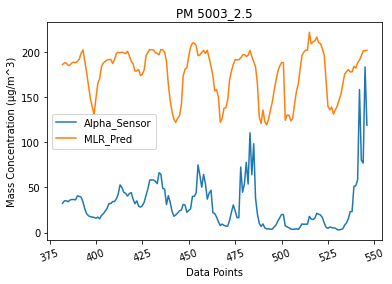

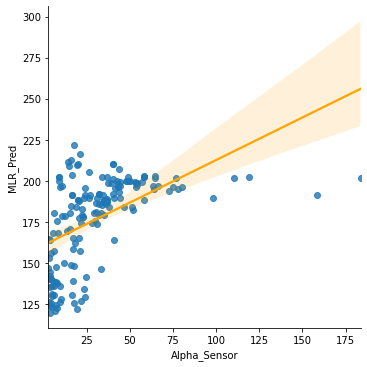

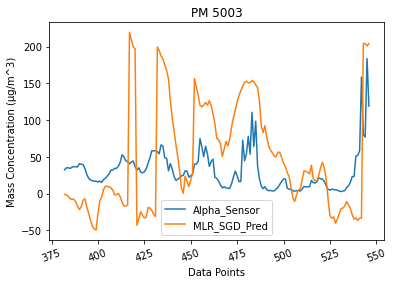

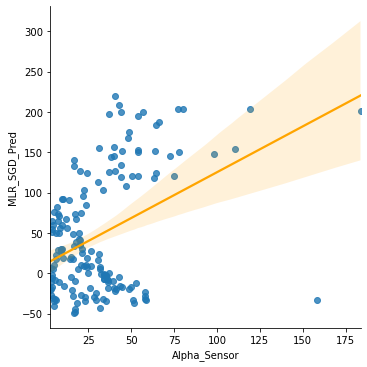

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["PMS_7003"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
+ lr.coef_[3]*df_test["Wind_Direction"] + lr.coef_[4]*df_test["Wind_Speed"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.title("PM 5003_2.5")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

     Alpha_Sensor   PMS_7003       Temp     RelHum  Wind_Direction  \
382     32.351667  18.147619  31.041667  67.788333          297.93   
383     35.119333  19.018750  30.890000  68.570000          300.85   
384     35.119333  19.018750  30.890000  68.570000          303.69   
385     34.180000  17.554688  31.098333  67.851667          305.31   
386     35.997966  16.877778  30.989831  68.474576          306.08   
..            ...        ...        ...        ...             ...   
542    158.493333  27.470312  31.403333  67.916667          357.51   
543     80.142500  32.911111  31.290000  68.093333            2.16   
544     76.978500  39.038095  31.138333  67.763333            7.63   
545    183.642000  35.284375  30.750000  69.015000           16.93   
546    118.977500  35.412121  30.693333  69.316667           20.81   

     Wind_Speed    MLR_Pred  MLR_SGD_Pred   KNN_Pred  
382        0.73  186.139430     -1.093305  22.702145  
383        0.70  188.032821     -1.803967  22.702

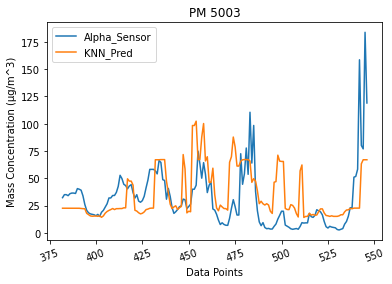

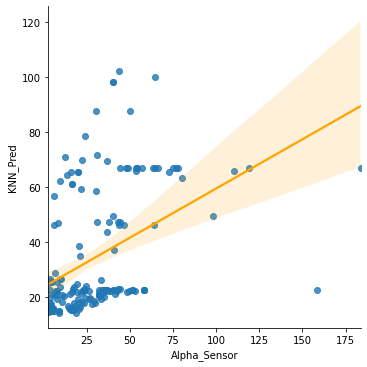

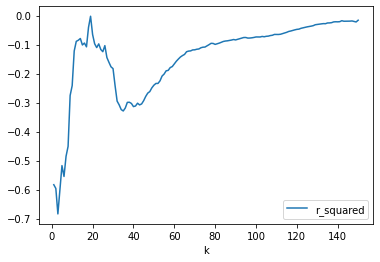

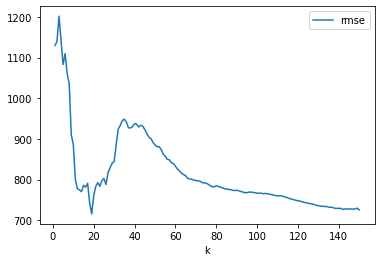

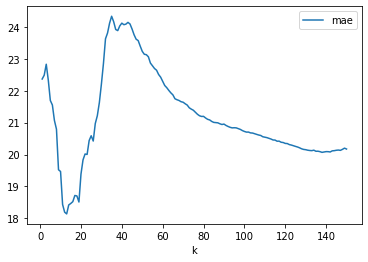

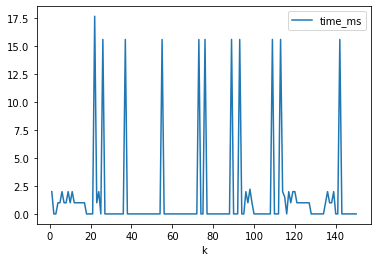

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

     Alpha_Sensor   PMS_7003       Temp     RelHum  Wind_Direction  \
382     32.351667  18.147619  31.041667  67.788333          297.93   
383     35.119333  19.018750  30.890000  68.570000          300.85   
384     35.119333  19.018750  30.890000  68.570000          303.69   
385     34.180000  17.554688  31.098333  67.851667          305.31   
386     35.997966  16.877778  30.989831  68.474576          306.08   
..            ...        ...        ...        ...             ...   
542    158.493333  27.470312  31.403333  67.916667          357.51   
543     80.142500  32.911111  31.290000  68.093333            2.16   
544     76.978500  39.038095  31.138333  67.763333            7.63   
545    183.642000  35.284375  30.750000  69.015000           16.93   
546    118.977500  35.412121  30.693333  69.316667           20.81   

     Wind_Speed    MLR_Pred  MLR_SGD_Pred   KNN_Pred     RF_Pred  
382        0.73  186.139430     -1.093305  22.702145   25.935930  
383        0.70  188.0328

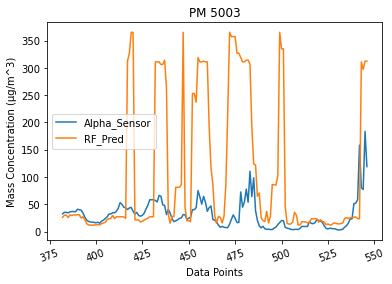

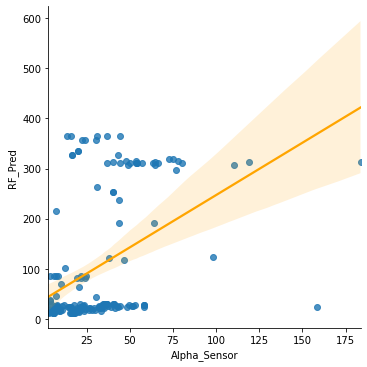

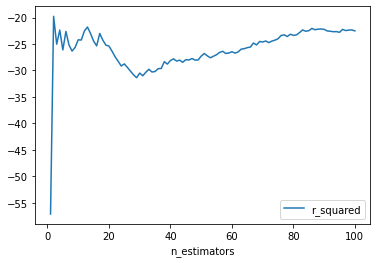

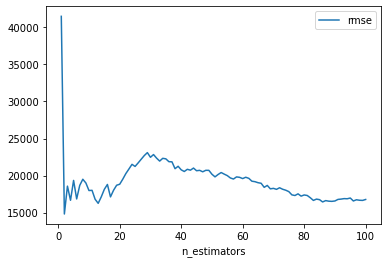

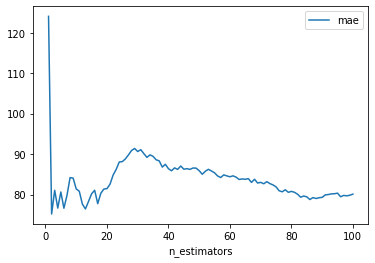

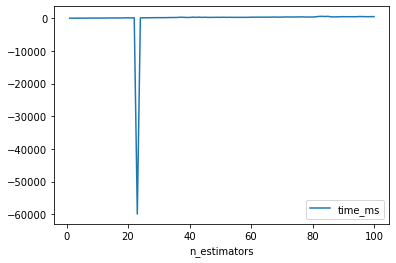

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

Loss functions:
* R-squared = -0.16426303771887896
* RMSE = 28.825946557680087
* MAE = 21.48259754515564
Loss functions:
* R-squared = -1.4846720450493485
* RMSE = 42.110709535476964
* MAE = 34.443211603812784
Loss functions:
* R-squared = -11909.397356760854
* RMSE = 2915.5543890842077
* MAE = 1485.7176872396856
Correlation_corr_RBF_Pred:  0.3117203901579626
Correlation_corr_lin:  0.42044534956512025
Correlation_corr_Poly_Pred:  0.4847057333878247


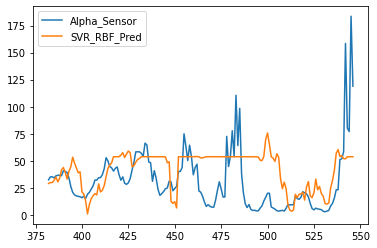

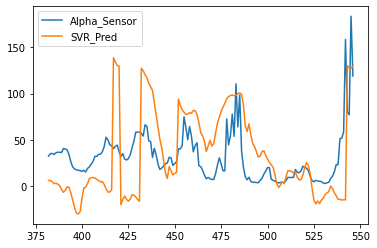

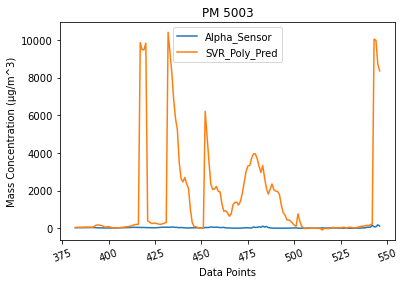

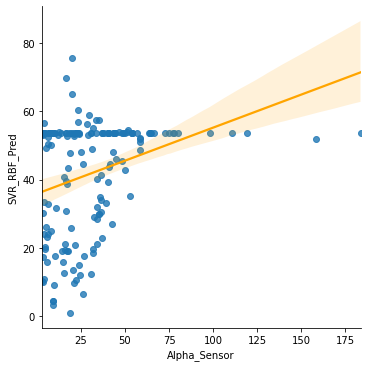

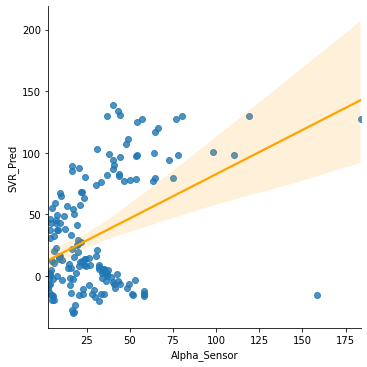

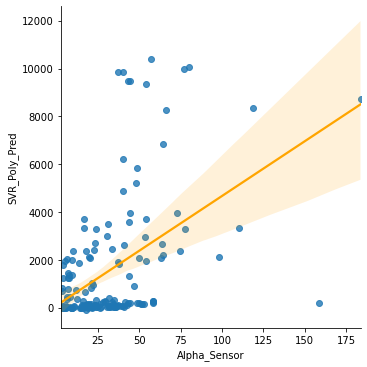

In [5]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_RBF_Pred"]].plot()
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
df_test[["Alpha_Sensor", "SVR_Poly_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_RBF_Pred = df_test["SVR_RBF_Pred"].corr(x)
corr_lin = df_test["SVR_Pred"].corr(x)
corr_Poly_Pred = df_test["SVR_Poly_Pred"].corr(x)
print("Correlation_corr_RBF_Pred: ", corr_RBF_Pred)
print("Correlation_corr_lin: ", corr_lin)
print("Correlation_corr_Poly_Pred: ", corr_Poly_Pred)

C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


     Alpha_Sensor   PMS_7003       Temp     RelHum  Wind_Direction  \
382     32.351667  18.147619  31.041667  67.788333          297.93   
383     35.119333  19.018750  30.890000  68.570000          300.85   
384     35.119333  19.018750  30.890000  68.570000          303.69   
385     34.180000  17.554688  31.098333  67.851667          305.31   
386     35.997966  16.877778  30.989831  68.474576          306.08   
..            ...        ...        ...        ...             ...   
542    158.493333  27.470312  31.403333  67.916667          357.51   
543     80.142500  32.911111  31.290000  68.093333            2.16   
544     76.978500  39.038095  31.138333  67.763333            7.63   
545    183.642000  35.284375  30.750000  69.015000           16.93   
546    118.977500  35.412121  30.693333  69.316667           20.81   

     Wind_Speed    MLR_Pred  MLR_SGD_Pred   KNN_Pred     RF_Pred  \
382        0.73  186.139430     -1.093305  22.702145   25.935930   
383        0.70  188.03

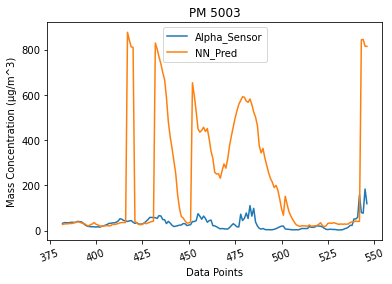

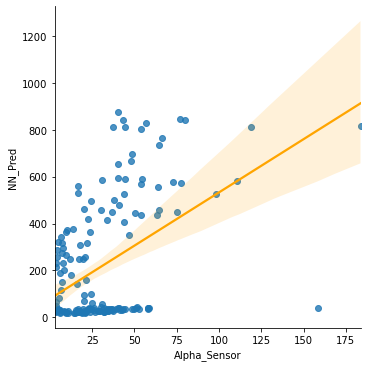

In [6]:
# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)

Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = 0.025722967485279358
* RMSE = 26.369339668039856
* MAE = 20.261127883368466
Correlation:  0.3299846856141417


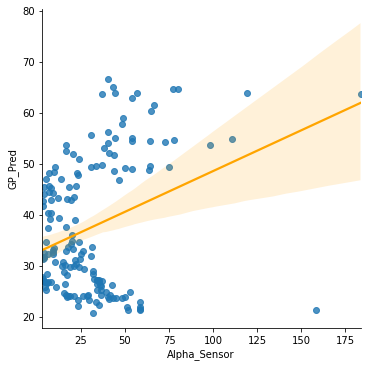

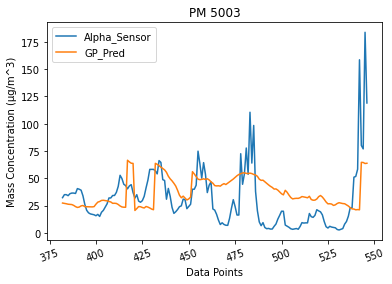

In [7]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
dpwh = DotProduct() + WhiteKernel()

# Models
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("Dot params", gp_dpwh.get_params())

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_d = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr_d)

In [8]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
#nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 250)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)

2.10.0
Epoch 1/250


ValueError: in user code:

    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 5)
